## Setting up Workshop

In [25]:
## Import Libraries
# DataFrames
import pandas as pd
# Visualization
from matplotlib import pyplot as plt
# Fancy Visualization
import seaborn as sns

## Import Functions
# Random Number Generator
from sklearn.datasets import make_classification
# Logistc Regression Machine
from sklearn.linear_model import LogisticRegression
# Splitting Training and Testing Data
from sklearn.model_selection import train_test_split
# Confusion Matrix
from sklearn.metrics import confusion_matrix

## Setting up Seaborn
sns.set()

## Data Mining

In [26]:
## Generate Random Numbers for Classification
# 100 samples
# 1 feature 
# 2 classes
# 1 Cluster per class
# 3% of Values switch classes
# 1 informative feature
# no redundant or repeatet features
# As a result y being either 1 or 0 and x being on a spectrum
x, y = make_classification(
    n_samples            = 100,
    n_features           = 1,
    n_classes            = 2,
    n_clusters_per_class = 1,
    flip_y               = 0.03,
    n_informative        = 1,
    n_redundant          = 0,
    n_repeated           = 0)

## Data Exploration

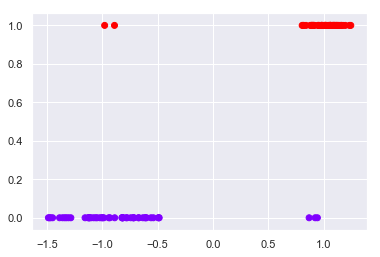

In [27]:
# Plot generated Data
plt.scatter(x,
            y,
            c = y,
            cmap = 'rainbow')
plt.show()

## Predictive Modeling

In [28]:
# Split Data into training and testing Data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [29]:
# Create Logistic Regression Machine
lr = LogisticRegression(solver='lbfgs')
# Feed it the training Data
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
## Print Results:
# slope of sigmoid function
print(lr.coef_)
# intercept of sigmoid function
print(lr.intercept_)

[[2.78287741]]
[-0.19633418]


In [31]:
## Test Model on test Data
# Pedrict using generated Model
y_pred = lr.predict(x_test)
# Show Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[11,  2],
       [ 1, 11]])

In [32]:
# Show the Probabilities of each Observation belonging to 1 or 0
lr.predict_proba(x_test)

array([[0.05980803, 0.94019197],
       [0.08073819, 0.91926181],
       [0.94222289, 0.05777711],
       [0.0439843 , 0.9560157 ],
       [0.94896497, 0.05103503],
       [0.92236857, 0.07763143],
       [0.08879594, 0.91120406],
       [0.07931837, 0.92068163],
       [0.96485589, 0.03514411],
       [0.09512919, 0.90487081],
       [0.87656103, 0.12343897],
       [0.06769551, 0.93230449],
       [0.89887988, 0.10112012],
       [0.87058516, 0.12941484],
       [0.93521854, 0.06478146],
       [0.94372927, 0.05627073],
       [0.95219365, 0.04780635],
       [0.07933528, 0.92066472],
       [0.06239976, 0.93760024],
       [0.04966589, 0.95033411],
       [0.03770236, 0.96229764],
       [0.84500681, 0.15499319],
       [0.98711243, 0.01288757],
       [0.05432366, 0.94567634],
       [0.08497152, 0.91502848]])

## Data Visualization

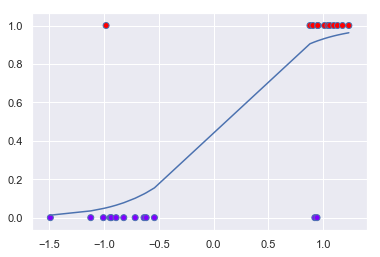

In [33]:
## Visualize Sigmoid Function + Test Data
# Put Data into DataFrame
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
# Sort Values
df = df.sort_values(by='x')
# Import Signoid Function
from scipy.special import expit
# Set up Signoid Function
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
## Create plot
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')
plt.show()